# Constructing a WIMP Spectrum

The point of this notebook is to construct what a Si low-mass WIMP spectrum would look like at very low energy, with an HVeV detector biased to ~100V in the 1-5 e/h pair region. This is to illustrate how a variance in the nuclear recoil charge production can produce large effects. 

## Get the WIMP CDF

In [1]:
#get the stored CDF from a file
import dataPython as dp
import numpy as np
data = dp.getXYZdata('WIMP_xsections/WIMP_Si_PDF_CDF_0.5GeV_1e-06keV_steps_fmt.txt')

#convert to numpy arrays
ekev = np.asarray(data['xx'])
pdf = np.asarray(data['yy'])
cdf = np.asarray(data['zz'])

print(data.keys())

dict_keys(['xx', 'yy', 'zz'])


In [2]:
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerLine2D
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

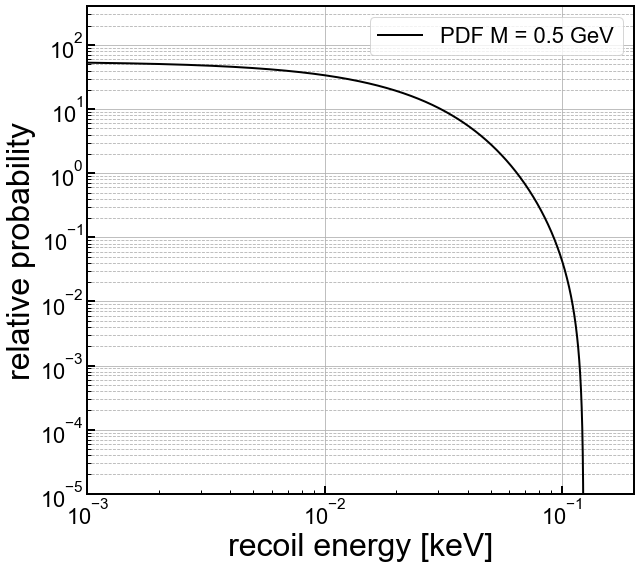

In [3]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmin = 0.001
xmax = 0.2
X = np.arange(xmin,xmax,0.01)

ax1.plot(ekev,pdf,'k-',label='PDF M = 0.5 GeV')


ymin=1e-5
ymax=400


ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('recoil energy [keV]',**axis_font)
ax1.set_ylabel('relative probability',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figures.png')
plt.show()

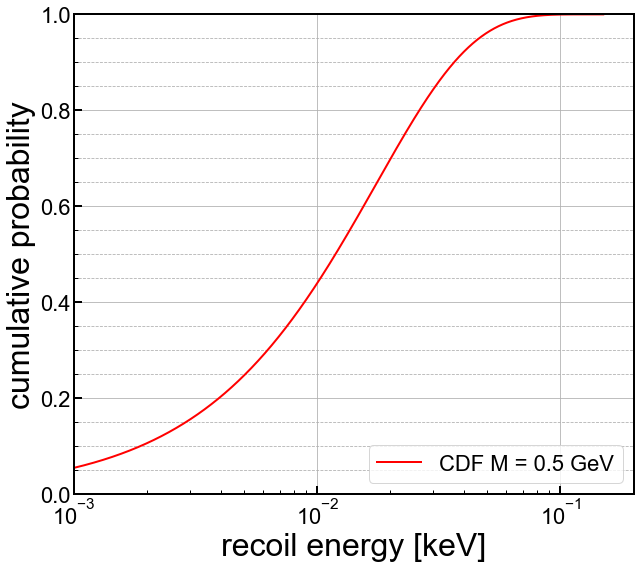

In [6]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmin = 0.001
xmax = 0.2
X = np.arange(xmin,xmax,0.01)

ax1.plot(ekev,cdf,'r-',label='CDF M = 0.5 GeV')


ymin=1e-5
ymax=1


ax1.set_yscale('linear')
ax1.set_xscale('log')
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('recoil energy [keV]',**axis_font)
ax1.set_ylabel('cumulative probability',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=4,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figures.png')
plt.show()

## Interpolate Inverted WIMP CDF and Generate Er

In [11]:
import scipy.interpolate as inter

#find first place cdf is unity
idx = np.arange(0,np.shape(cdf)[0])
print(idx)
idx_unity = idx[cdf>=1]
min_unity = np.min(idx_unity)
cdf_cut = cdf[idx<=min_unity]
ekev_cut = ekev[idx<=min_unity]

g = inter.InterpolatedUnivariateSpline (cdf_cut, ekev_cut, k=3)

[     0      1      2 ... 149997 149998 149999]


In [14]:
print(g(0.65))

0.0176334498930506


## Grab the Yield Model (DAMIC) and Generate N

In [19]:
import damic_y as dy 

#a spline extrapolation to DAMIC data
damic_y = dy.getDAMICy()
damic_yv = np.vectorize(damic_y) #vectorize it

0.04942362252348296


In [28]:
#dream up some constants
F=1
eps = 3.8 #for silicon

Ntot = 100
u = np.random.uniform(0,1,(Ntot,))
Er = g(u)*1000 #use eV
print(Er[0:10])
Nav = Er*damic_yv(Er)*(1/eps)
print(Nav[0:10])

#get a bunch of recoil energies





[ 6.55169446 50.65157794 27.52056233 12.92834764 33.63066001 11.71192414
 29.47897054 26.04548642 31.7766661  20.99205886]
[0.06555967 0.58004556 0.29447966 0.13211227 0.36658225 0.11920861
 0.31732728 0.27743496 0.34444938 0.22011511]
